In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class SoftMarginSVC:
    def __init__(self):
        self.w = None
        self.b = None
        
    def linear_output(self,xi):
        return self.w.T @ xi + self.b
    
    def hinge_loss(self,y_true,y_pred):
        return max(0,1-y_true*y_pred)
    
    def loss(self,y_true,y_pred):
        reg = 0.5 * self.w.T @ self.w
        hinge = self.hinge_loss(y_true,y_pred)
        return reg+self.C*hinge
    
    def fit(self, X, y, lr=0.01, C=1.0, epochs=1000):
        self.C = C
        n_samples, n_features = X.shape
        y = np.array(y)
        y[y == 0] = -1
        self.b = 0
        self.w = np.random.randn(n_features, 1)
        losses = []
        for epoch in range(epochs):
            losses_per_epoch = 0
            for i, xi in enumerate(X):
                y_pred = self.linear_output(xi)
                functional_margin = y[i] * y_pred
                loss_val = self.loss(y[i], y_pred)
                losses_per_epoch += loss_val
                if functional_margin >= 1:
                    dw = self.w
                    db = 0
                else:
                    dw = self.w - self.C * y[i] * xi.reshape(-1, 1)
                    db = -self.C * y[i]
                self.w -= lr * dw
                self.b -= lr * db
            losses_per_epoch /= n_samples
            losses.append(losses_per_epoch[0][0])
            if epoch % 100==0:
                print(f"epoch {epoch}: loss = {losses_per_epoch[0][0]}")
        return losses

    def predict(self, X):
        return np.array([1 if self.linear_output(xi) >= 0 else 0 for xi in X])
    
    def plot_hyperplane(self,X,y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = (np.dot(xy, self.w) + self.b).reshape(XX.shape)

        # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

        # Add labels and title
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('SVM Hyperplane and Margins')

        # Reset limits
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        plt.show()

In [23]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM
svc = SoftMarginSVC()
losses=svc.fit(X_train, y_train,C=1.0, lr=0.01, epochs=300)

# Predict and evaluate
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))

epoch 0: loss = 0.14107373333694212
epoch 100: loss = 0.05335028104934546
epoch 200: loss = 0.05335028104934546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
losses

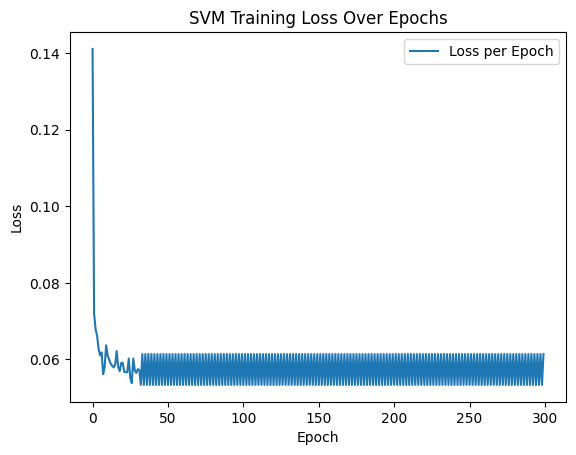

In [25]:
plt.plot(losses, label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SVM Training Loss Over Epochs')
plt.legend()
plt.show()

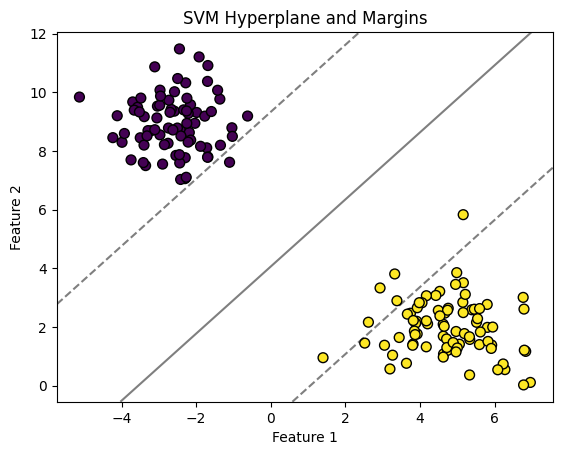

In [26]:
svc.plot_hyperplane(X_train,y_train)